We all know that Health care is very important domain in the market. It is directly linked with the life of the individual; hence we have to be always beproactive in this particular domain. Money plays a major role in this domain, because sometime treatment becomes super costly and if any individual is not covered under the insurance then it will become a pretty tough financial situation for that individual. The companies in the medical insurance also want to reduce their risk by optimizing the insurance cost, because we all know a healthy body is in the hand of the individual only. If individual eat healthy and do proper exercise the chance of getting illis drastically reduced.

Goal & Objective: The objective of this exerciseis to build a model, using data thatprovide the optimum insurance cost for an individual.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
                                        

In [2]:
df=pd.read_csv("C://Users//Suga//Downloads//Healthcare Data.csv")

In [3]:
df.head()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,...,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,...,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,...,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,...,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,...,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [5]:
df.shape

(25000, 24)

In [6]:
df.describe(include='all')

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
count,25000.000000,25000.000000,25000.000000,25000.000000,25000,25000.000000,25000,25000.000000,25000.000000,25000.000000,...,25000,13119.000000,25000,25000.000000,25000,25000,25000,25000.000000,25000.000000,25000.000000
unique,NaN,NaN,NaN,NaN,3,NaN,5,NaN,NaN,NaN,...,4,NaN,15,NaN,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Student,NaN,150 to 175,NaN,NaN,NaN,...,never smoked,NaN,Bangalore,NaN,N,Rare,Moderate,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,10169,NaN,8763,NaN,NaN,NaN,...,9249,NaN,1742,NaN,17418,13752,14638,NaN,NaN,NaN
mean,17499.500000,4.089040,0.773680,0.081720,NaN,3.104200,NaN,5215.889320,44.918320,0.054640,...,NaN,2003.892217,NaN,71.610480,NaN,NaN,NaN,2.517960,28.812280,27147.407680
std,7217.022701,2.606612,1.199449,0.273943,NaN,1.141663,NaN,1053.179748,16.107492,0.227281,...,NaN,7.581521,NaN,9.325183,NaN,NaN,NaN,1.690335,8.632382,14323.691832
min,5000.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,2034.000000,16.000000,0.000000,...,NaN,1990.000000,NaN,52.000000,NaN,NaN,NaN,0.000000,11.000000,2468.000000
25%,11249.750000,2.000000,0.000000,0.000000,NaN,2.000000,NaN,4543.000000,31.000000,0.000000,...,NaN,1997.000000,NaN,64.000000,NaN,NaN,NaN,1.000000,21.000000,16042.000000
50%,17499.500000,4.000000,0.000000,0.000000,NaN,3.000000,NaN,5089.000000,45.000000,0.000000,...,NaN,2004.000000,NaN,72.000000,NaN,NaN,NaN,3.000000,31.000000,27148.000000
75%,23749.250000,6.000000,1.000000,0.000000,NaN,4.000000,NaN,5730.000000,59.000000,0.000000,...,NaN,2010.000000,NaN,78.000000,NaN,NaN,NaN,4.000000,36.000000,37020.000000


Checkng Missing value

In [7]:
def missing_check(data):
    total = data.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df)

,Total,Percent
Year_last_admitted,11881,0.47524
bmi,990,0.03960
insurance_cost,0,0.00000
other_major_decs_history,0,0.00000
years_of_insurance_with_us,0,0.00000
regular_checkup_lasy_year,0,0.00000
adventure_sports,0,0.00000
Occupation,0,0.00000
visited_doctor_last_1_year,0,0.00000
cholesterol_level,0,0.00000


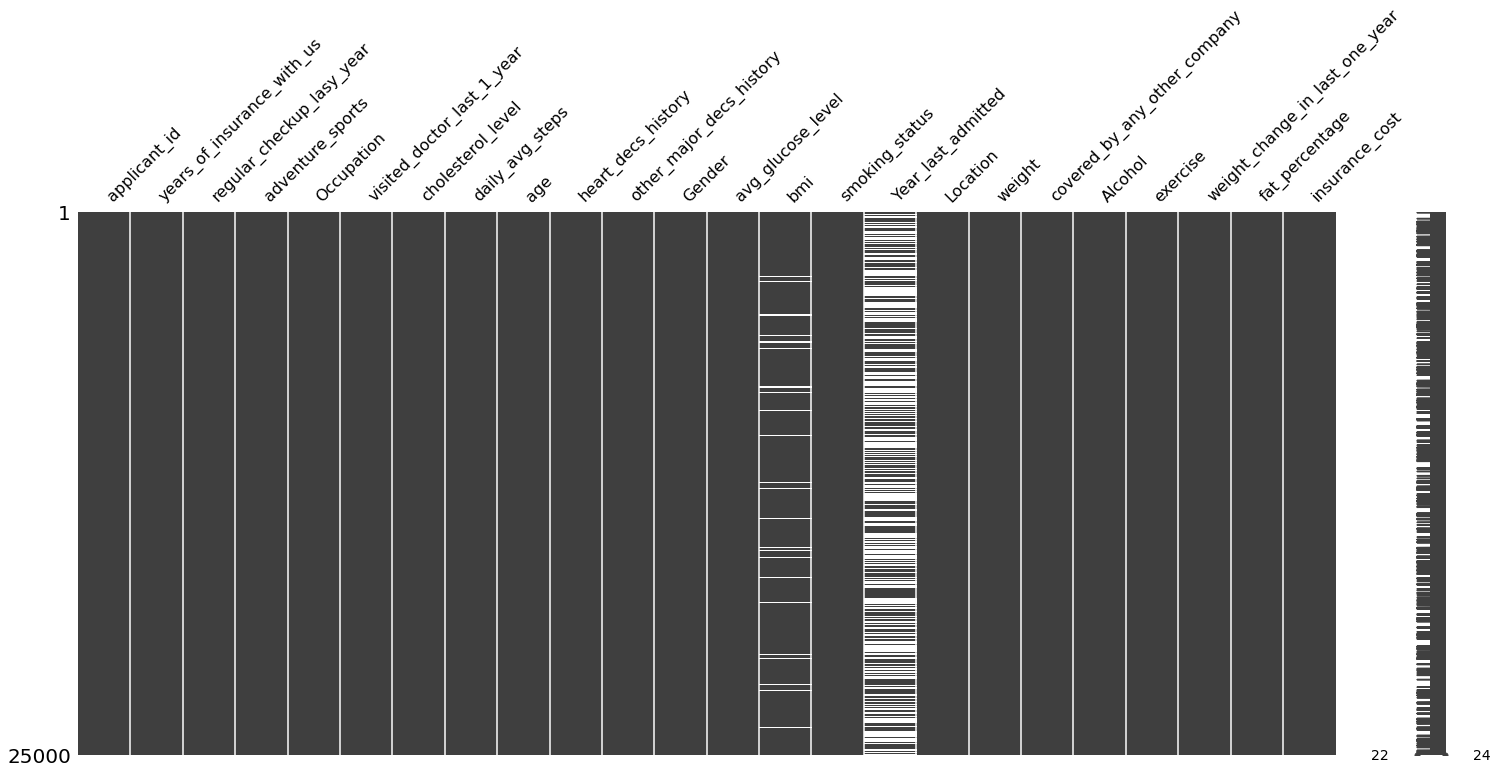

In [8]:
import missingno as msno
msno.matrix(df)

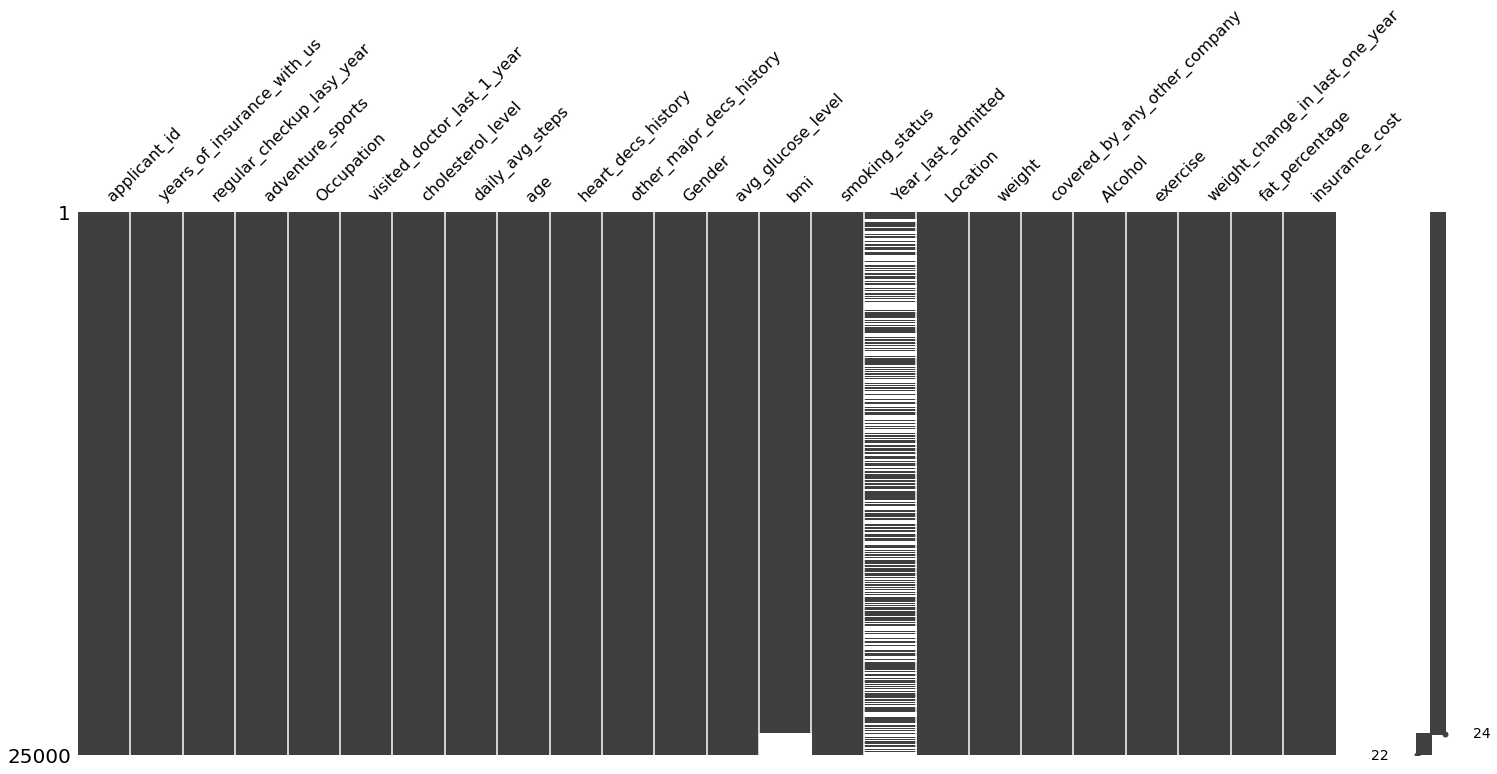

In [9]:
sorted = df.sort_values('bmi')
msno.matrix(sorted)

In [10]:
df.dtypes

applicant_id                        int64
years_of_insurance_with_us          int64
regular_checkup_lasy_year           int64
adventure_sports                    int64
Occupation                         object
visited_doctor_last_1_year          int64
cholesterol_level                  object
daily_avg_steps                     int64
age                                 int64
heart_decs_history                  int64
other_major_decs_history            int64
Gender                             object
avg_glucose_level                   int64
bmi                               float64
smoking_status                     object
Year_last_admitted                float64
Location                           object
weight                              int64
covered_by_any_other_company       object
Alcohol                            object
exercise                           object
weight_change_in_last_one_year      int64
fat_percentage                      int64
insurance_cost                    

In [11]:
df['adventure_sports'] = df['adventure_sports'].astype('object')
df['heart_decs_history']= df['heart_decs_history'].astype('object')
df['other_major_decs_history']=df['other_major_decs_history'].astype('object')

In [12]:
df.dtypes

applicant_id                        int64
years_of_insurance_with_us          int64
regular_checkup_lasy_year           int64
adventure_sports                   object
Occupation                         object
visited_doctor_last_1_year          int64
cholesterol_level                  object
daily_avg_steps                     int64
age                                 int64
heart_decs_history                 object
other_major_decs_history           object
Gender                             object
avg_glucose_level                   int64
bmi                               float64
smoking_status                     object
Year_last_admitted                float64
Location                           object
weight                              int64
covered_by_any_other_company       object
Alcohol                            object
exercise                           object
weight_change_in_last_one_year      int64
fat_percentage                      int64
insurance_cost                    

In [13]:
df.dropna(subset=['bmi'],inplace=True)

In [14]:
df=df.drop(['applicant_id'],axis=1)

In [15]:
df.isnull().sum()

years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                   0
smoking_status                        0
Year_last_admitted                11429
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

In [22]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost


df['Year_last_admitted']=df['Year_last_admitted'].astype('object')

In [14]:
df['Year_last_admitted'].value_counts()

2010.0    557
1995.0    538
2007.0    532
2002.0    520
2000.0    516
2013.0    516
1994.0    514
1998.0    514
1997.0    513
2009.0    512
1993.0    508
2001.0    507
2003.0    504
2008.0    503
1999.0    498
2014.0    496
2005.0    491
1996.0    487
2012.0    483
2004.0    481
2011.0    475
2006.0    472
2015.0    449
1992.0    382
2016.0    370
1991.0    276
2017.0    253
2018.0    130
1990.0    122
Name: Year_last_admitted, dtype: int64

Fill year_last_admitted with mode '0' is 2010

C:\Users\Suga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


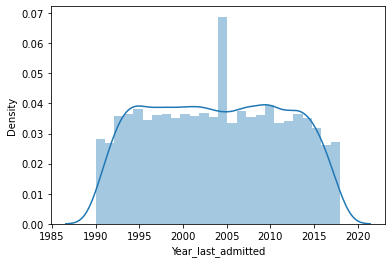

In [16]:
sns.distplot(df['Year_last_admitted'])

In [17]:
df['Year_last_admitted'].describe()

count    13119.000000
mean      2003.892217
std          7.581521
min       1990.000000
25%       1997.000000
50%       2004.000000
75%       2010.000000
max       2018.000000
Name: Year_last_admitted, dtype: float64

In [18]:
df=df.fillna(df.median())

df['Year_last_admitted'] = df['Year_last_admitted'].fillna('2010')a

In [19]:
df.isnull().sum()

applicant_id                      0
years_of_insurance_with_us        0
regular_checkup_lasy_year         0
adventure_sports                  0
Occupation                        0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
Gender                            0
avg_glucose_level                 0
bmi                               0
smoking_status                    0
Year_last_admitted                0
Location                          0
weight                            0
covered_by_any_other_company      0
Alcohol                           0
exercise                          0
weight_change_in_last_one_year    0
fat_percentage                    0
insurance_cost                    0
dtype: int64

C:\Users\Suga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


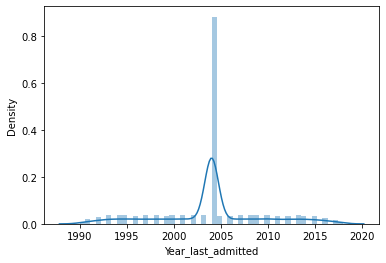

In [20]:
sns.distplot(df['Year_last_admitted'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24010 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      24010 non-null  int64  
 1   regular_checkup_lasy_year       24010 non-null  int64  
 2   adventure_sports                24010 non-null  int64  
 3   Occupation                      24010 non-null  object 
 4   visited_doctor_last_1_year      24010 non-null  int64  
 5   cholesterol_level               24010 non-null  object 
 6   daily_avg_steps                 24010 non-null  int64  
 7   age                             24010 non-null  int64  
 8   heart_decs_history              24010 non-null  int64  
 9   other_major_decs_history        24010 non-null  int64  
 10  Gender                          24010 non-null  object 
 11  avg_glucose_level               24010 non-null  int64  
 12  bmi                             

In [29]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'under-weight'
    elif bmi >= 18.5 and bmi <= 23.9:
        return 'normal-weight'
    elif bmi >= 24 and bmi <= 29.9:
        return 'over-weight'
    elif bmi > 30.0:
        return "obese"
    
def age_category(age):
    age_dict = {
        0: '0-9',
        1: '10-19',
        2: '20-29',
        3: '30-39',
        4: '40-49',
        5: '50-59',
        6: '60-69',
        7: '70-79',
        8: '80-89',
        9: '90-99',
    }
    return age_dict[age//10]
    

In [30]:
def dailysteps_category(daily_avg_steps):
    dailysteps_dict = {
        0:'0-999',
        1: '1000-1999',
        2: '2000-2999',
        3: '3000-3999',
        4: '4000-4999',
        5: '5000-5999',
        6: '6000-6999',
        7: '7000-7999',
        8: '8000-8999',
        9: '9000-9999',
        10: '10000-10999',
        11: '11000-11999'
    }
    return dailysteps_dict[daily_avg_steps//1000]
    

In [31]:
def avg_glucose_level_category(avg_glucose_level):
    if avg_glucose_level < 140:
        return 'normal'
    elif avg_glucose_level >= 140 and avg_glucose_level <= 199:
        return 'pre-diabetic'
    elif avg_glucose_level > 200:
        return "diabetes"

In [32]:
data=df.copy()

In [33]:
data['cbmi'] = data['bmi'].apply(lambda x: "none")
data['cage'] = data['age'].apply(lambda x: "none")
data['cdailyavgsteps']=data['daily_avg_steps'].apply(lambda x: "none")
data['cavgglucoselevel']=data['avg_glucose_level'].apply(lambda x: "none")

In [34]:
for idx, row in data.iterrows():
    data.at[idx, 'cage'] = age_category(row['age'])
    data.at[idx, 'cbmi'] = bmi_category(row['bmi'])
    data.at[idx, 'cdailyavgsteps'] = dailysteps_category(row['daily_avg_steps'])
    data.at[idx, 'cavgglucoselevel'] = avg_glucose_level_category(row['avg_glucose_level'])
    
by_age = data.groupby(by='cage').size()
print (by_age)
print ('-'*80)

cage
10-19    1037
20-29    4248
30-39    4406
40-49    4376
50-59    4252
60-69    4222
70-79    1469
dtype: int64
--------------------------------------------------------------------------------


In [35]:
by_avg_glucose = data.groupby(by='cavgglucoselevel').size()
print (by_avg_glucose)
print ('-'*80)

cavgglucoselevel
diabetes        8368
normal          8930
pre-diabetic    6613
dtype: int64
--------------------------------------------------------------------------------


In [36]:
by_chl = data .groupby(by='cholesterol_level').size()
print (by_chl)
print ('-'*80)

cholesterol_level
125 to 150    8001
150 to 175    8396
175 to 200    2778
200 to 225    2862
225 to 250    1973
dtype: int64
--------------------------------------------------------------------------------


In [37]:
by_cavgsteps = data.groupby(by='cdailyavgsteps').size()
print (by_cavgsteps)
print ('-'*80)

cdailyavgsteps
10000-10999      13
11000-11999       2
2000-2999       164
3000-3999      1991
4000-4999      8797
5000-5999      8608
6000-6999      3001
7000-7999       968
8000-8999       344
9000-9999       122
dtype: int64
--------------------------------------------------------------------------------


In [38]:
by_gender = df.groupby(by='Gender').size()
print (by_gender)
print ('-'*80)

Gender
Female     8321
Male      15689
dtype: int64
--------------------------------------------------------------------------------


In [39]:

by_location = data.groupby(by='Location').size()
print (by_location)
print ('-'*80)

Location
Ahmedabad      1605
Bangalore      1670
Bhubaneswar    1635
Chennai        1612
Delhi          1613
Guwahati       1598
Jaipur         1640
Kanpur         1595
Kolkata        1562
Lucknow        1581
Mangalore      1626
Mumbai         1591
Nagpur         1584
Pune           1573
Surat          1525
dtype: int64
--------------------------------------------------------------------------------


In [40]:
by_smokers = data .groupby(by='smoking_status').size()
print (by_smokers)
print ('-'*80)

smoking_status
Unknown            7253
formerly smoked    4091
never smoked       9052
smokes             3614
dtype: int64
--------------------------------------------------------------------------------


In [41]:
by_drinkers = data .groupby(by='Alcohol').size()
print (by_drinkers)
print ('-'*80)

Alcohol
Daily     2606
No        8202
Rare     13202
dtype: int64
--------------------------------------------------------------------------------


In [42]:
by_occupation = df .groupby(by='Occupation').size()
print (by_occupation)
print ('-'*80)

Occupation
Business    9649
Salried     4613
Student     9748
dtype: int64
--------------------------------------------------------------------------------


In [38]:
by_exercise = data .groupby(by='exercise').size()
print (by_exercise)
print ('-'*80)

exercise
Extreme      5006
Moderate    14103
No           4901
dtype: int64
--------------------------------------------------------------------------------


In [39]:
data.shape

(24010, 27)

In [40]:
df.shape

(24010, 23)

In [43]:
data.isnull().sum()

years_of_insurance_with_us          0
regular_checkup_lasy_year           0
adventure_sports                    0
Occupation                          0
visited_doctor_last_1_year          0
cholesterol_level                   0
daily_avg_steps                     0
age                                 0
heart_decs_history                  0
other_major_decs_history            0
Gender                              0
avg_glucose_level                   0
bmi                                 0
smoking_status                      0
Year_last_admitted                  0
Location                            0
weight                              0
covered_by_any_other_company        0
Alcohol                             0
exercise                            0
weight_change_in_last_one_year      0
fat_percentage                      0
insurance_cost                      0
cbmi                              153
cage                                0
cdailyavgsteps                      0
cavgglucosel

In [44]:
data.dropna(subset=['cbmi','cavgglucoselevel'],inplace=True)

In [45]:
data.isnull().sum()

years_of_insurance_with_us        0
regular_checkup_lasy_year         0
adventure_sports                  0
Occupation                        0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
Gender                            0
avg_glucose_level                 0
bmi                               0
smoking_status                    0
Year_last_admitted                0
Location                          0
weight                            0
covered_by_any_other_company      0
Alcohol                           0
exercise                          0
weight_change_in_last_one_year    0
fat_percentage                    0
insurance_cost                    0
cbmi                              0
cage                              0
cdailyavgsteps                    0
cavgglucoselevel                  0
dtype: int64

In [46]:
data=data.drop(['bmi','age','daily_avg_steps','avg_glucose_level'],axis=1)

In [47]:
data.shape

(23759, 23)

In [48]:
for col in data.columns:
    print('{} : {}'.format(col,data[col].unique()))

years_of_insurance_with_us : [3 0 1 7 8 4 6 5 2]
regular_checkup_lasy_year : [1 0 4 3 2 5]
adventure_sports : [1 0]
Occupation : ['Salried' 'Student' 'Business']
visited_doctor_last_1_year : [ 2  4  3  5  1  8  7  6 10  9 12  0]
cholesterol_level : ['125 to 150' '150 to 175' '200 to 225' '175 to 200' '225 to 250']
heart_decs_history : [1 0]
other_major_decs_history : [0 1]
Gender : ['Male' 'Female']
smoking_status : ['Unknown' 'formerly smoked' 'never smoked' 'smokes']
Year_last_admitted : [2003.87735474 2004.         2003.         2007.         1994.
 2010.         2017.         2002.         1996.         2008.
 1991.         1995.         2001.         2013.         2011.
 2005.         2018.         1998.         1997.         1999.
 1992.         2012.         2009.         2014.         2000.
 1993.         2016.         2006.         2015.         1990.        ]
Location : ['Chennai' 'Jaipur' 'Bangalore' 'Bhubaneswar' 'Guwahati' 'Mumbai' 'Nagpur'
 'Surat' 'Pune' 'Kanpur' 'Mangal

In [49]:
data['smoking_status'].value_counts()

never smoked       8957
Unknown            7196
formerly smoked    4032
smokes             3574
Name: smoking_status, dtype: int64

In [50]:
data['smoking_status']=data['smoking_status'].replace('Unknown', np.nan)

In [51]:
data['smoking_status'].value_counts()

never smoked       8957
formerly smoked    4032
smokes             3574
Name: smoking_status, dtype: int64

In [52]:
data['smoking_status'].mode()

0    never smoked
dtype: object

In [53]:
data['smoking_status'] = data['smoking_status'].fillna('never smoked')

In [54]:
data['smoking_status'].value_counts()

never smoked       16153
formerly smoked     4032
smokes              3574
Name: smoking_status, dtype: int64

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23759 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      23759 non-null  int64  
 1   regular_checkup_lasy_year       23759 non-null  int64  
 2   adventure_sports                23759 non-null  int64  
 3   Occupation                      23759 non-null  object 
 4   visited_doctor_last_1_year      23759 non-null  int64  
 5   cholesterol_level               23759 non-null  object 
 6   heart_decs_history              23759 non-null  int64  
 7   other_major_decs_history        23759 non-null  int64  
 8   Gender                          23759 non-null  object 
 9   smoking_status                  23759 non-null  object 
 10  Year_last_admitted              23759 non-null  float64
 11  Location                        23759 non-null  object 
 12  weight                          

C:\Users\Suga\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


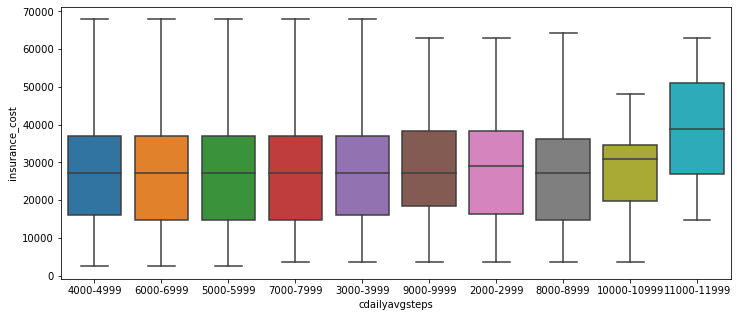

In [56]:
plt.figure(figsize=(12,5))
sns.boxplot(data['cdailyavgsteps'], data['insurance_cost'])  # Plots the scatter plot using two variables

C:\Users\Suga\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


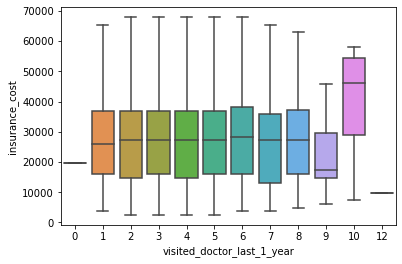

In [57]:
sns.boxplot(data['visited_doctor_last_1_year'], data['insurance_cost'])  # Plots the scatter plot using two variables

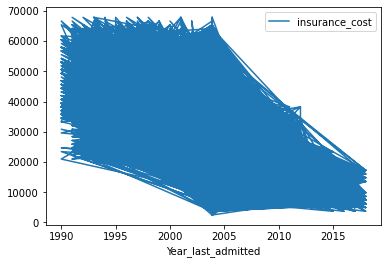

In [58]:
data.plot(x="Year_last_admitted", y="insurance_cost", kind="line")

C:\Users\Suga\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


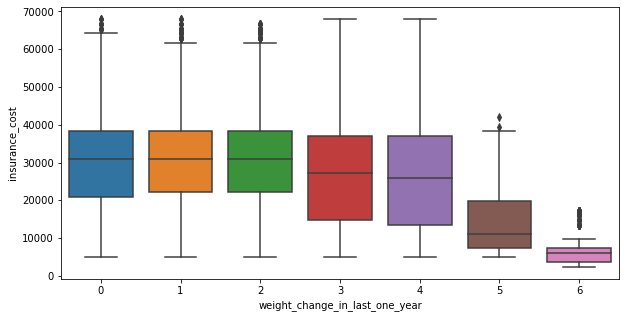

In [67]:
plt.figure(figsize=(10,5))
sns.boxplot(df['weight_change_in_last_one_year'], df['insurance_cost'])  # Plots the scatter plot using two variables

C:\Users\Suga\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


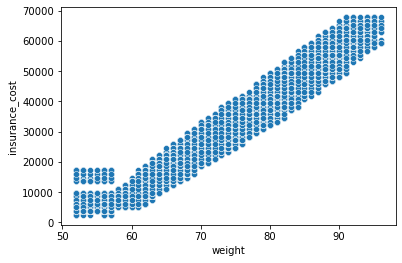

In [68]:
sns.scatterplot(df['weight'], df['insurance_cost'], palette='Set2') 

C:\Users\Suga\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


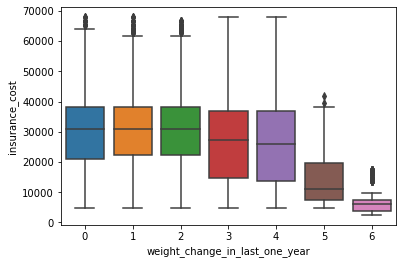

In [87]:
sns.boxplot(df['weight_change_in_last_one_year'], df['insurance_cost'])

C:\Users\Suga\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x360 with 0 Axes>

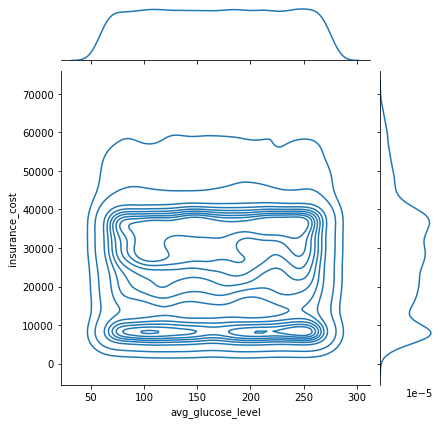

In [89]:
plt.figure(figsize=(10,5))
sns.jointplot(df['avg_glucose_level'], df['insurance_cost'],kind='kde')


C:\Users\Suga\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


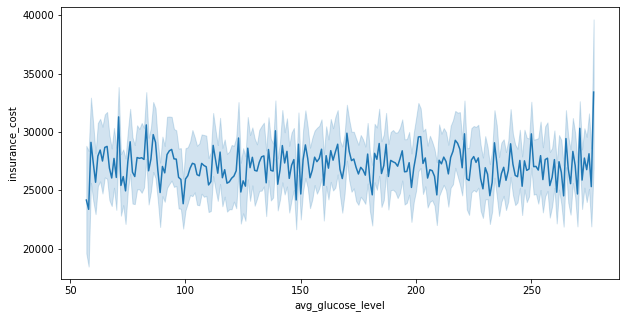

In [90]:
plt.figure(figsize=(10,5))
sns.lineplot(data['avg_glucose_level'], data['insurance_cost'])


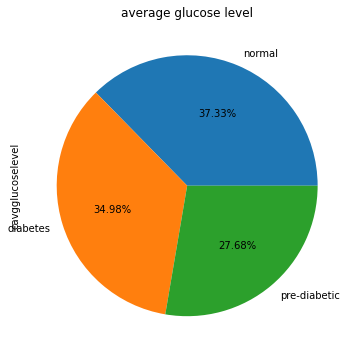

In [78]:
data['cavgglucoselevel'].value_counts().plot(kind='pie',title='average glucose level',autopct='%.2f%%',figsize=(6,6))

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

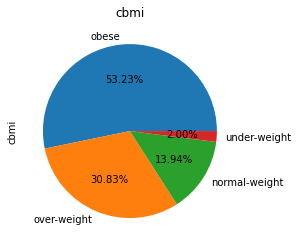

In [74]:

data['cbmi'].value_counts().plot(kind='pie', title='cbmi',autopct='%.2f%%', figsize=(5,4))

plt.xticks(rotation=0)

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

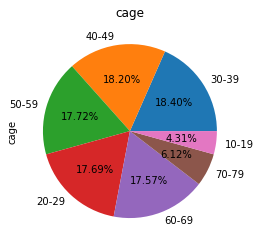

In [71]:

data['cage'].value_counts().plot(kind='pie', title='cage',autopct='%.2f%%', figsize=(5,4))

plt.xticks(rotation=0)

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

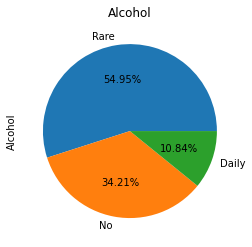

In [73]:

data['Alcohol'].value_counts().plot(kind='pie', title='Alcohol',autopct='%.2f%%', figsize=(5,4))

plt.xticks(rotation=0)

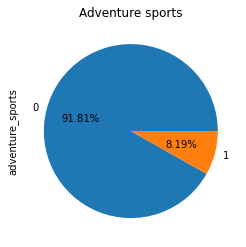

In [75]:
data['adventure_sports'].value_counts().plot(kind='pie',title='Adventure sports',autopct='%.2f%%',figsize=(5,4))

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

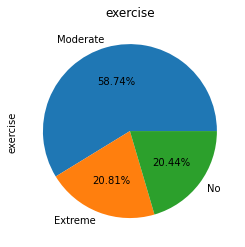

In [76]:

data['exercise'].value_counts().plot(kind='pie', title='exercise',autopct='%.2f%%', figsize=(5,4))

plt.xticks(rotation=0)

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

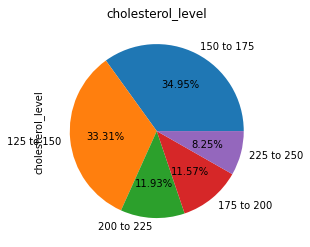

In [77]:

data['cholesterol_level'].value_counts().plot(kind='pie', title='cholesterol_level',autopct='%.2f%%', figsize=(6,4))

plt.xticks(rotation=0)

C:\Users\Suga\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


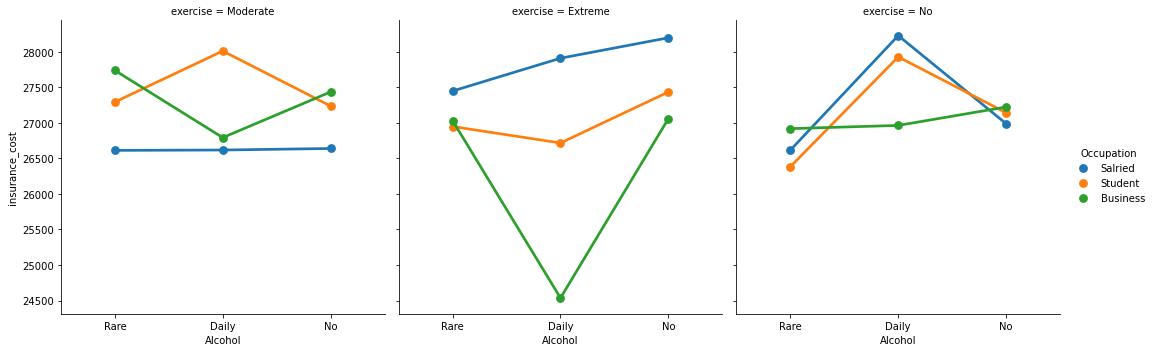

In [74]:
sns.catplot('Alcohol','insurance_cost', col='exercise', hue= 'Occupation', kind='point', data=data, ci = False);

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23759 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      23759 non-null  int64  
 1   regular_checkup_lasy_year       23759 non-null  int64  
 2   adventure_sports                23759 non-null  int64  
 3   Occupation                      23759 non-null  object 
 4   visited_doctor_last_1_year      23759 non-null  int64  
 5   cholesterol_level               23759 non-null  object 
 6   heart_decs_history              23759 non-null  int64  
 7   other_major_decs_history        23759 non-null  int64  
 8   Gender                          23759 non-null  object 
 9   smoking_status                  23759 non-null  object 
 10  Year_last_admitted              23759 non-null  float64
 11  Location                        23759 non-null  object 
 12  weight                          

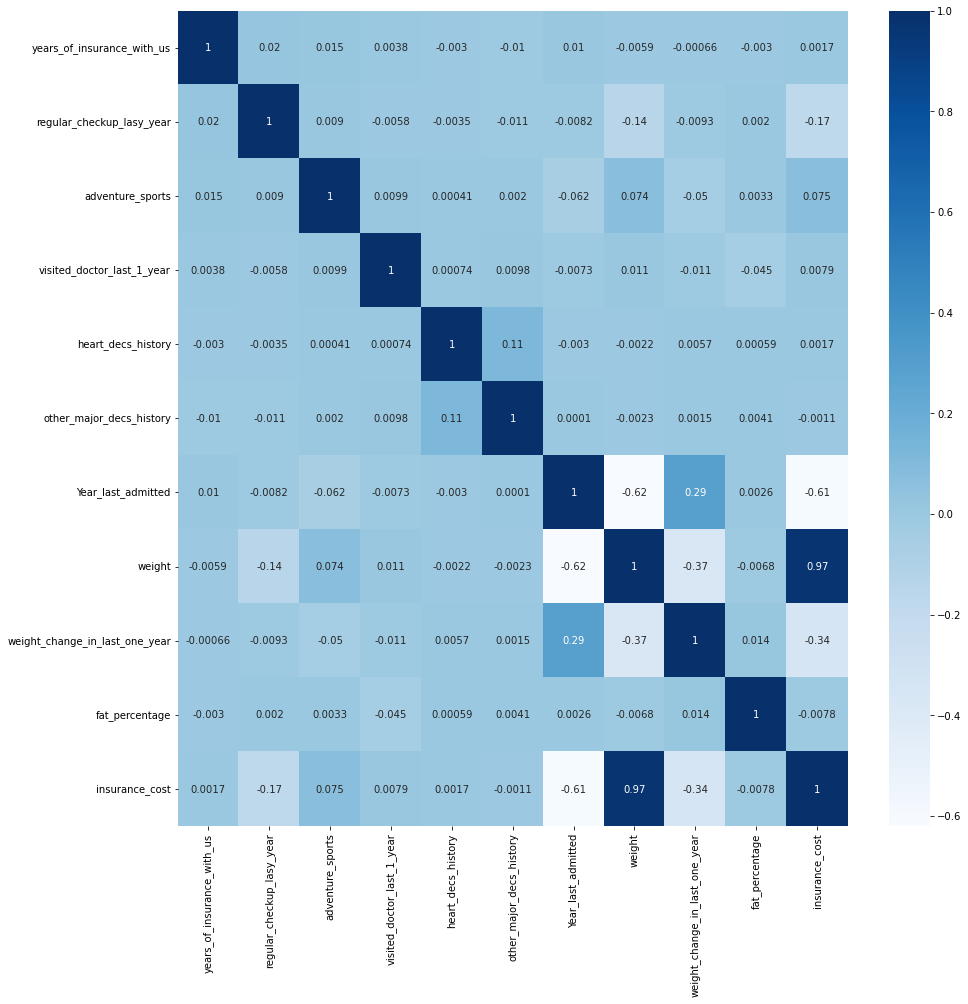

In [76]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')

In [77]:
#OUTLIER TREATMENT
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23759 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      23759 non-null  int64  
 1   regular_checkup_lasy_year       23759 non-null  int64  
 2   adventure_sports                23759 non-null  int64  
 3   Occupation                      23759 non-null  object 
 4   visited_doctor_last_1_year      23759 non-null  int64  
 5   cholesterol_level               23759 non-null  object 
 6   heart_decs_history              23759 non-null  int64  
 7   other_major_decs_history        23759 non-null  int64  
 8   Gender                          23759 non-null  object 
 9   smoking_status                  23759 non-null  object 
 10  Year_last_admitted              23759 non-null  float64
 11  Location                        23759 non-null  object 
 12  weight                          

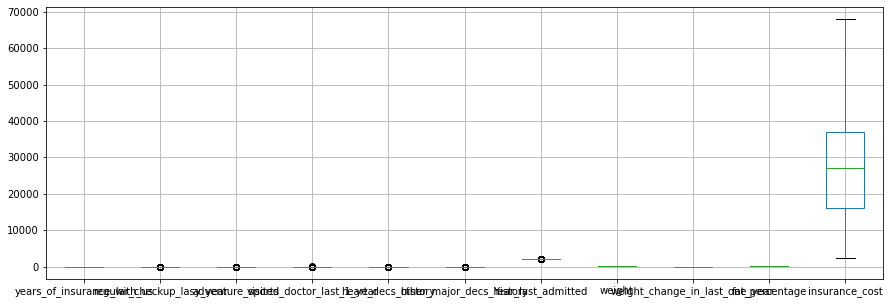

In [59]:
plt.figure(figsize=(15,5))
data.boxplot()

In [60]:
def remove_outlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [61]:
lrlastcheckup,urlastcheckup=remove_outlier(data['regular_checkup_lasy_year'])
data['regular_checkup_lasy_year']=np.where(data['regular_checkup_lasy_year']>urlastcheckup,urlastcheckup,data['regular_checkup_lasy_year'])
data['regular_checkup_lasy_year']=np.where(data['regular_checkup_lasy_year']<lrlastcheckup,lrlastcheckup,data['regular_checkup_lasy_year'])



In [62]:
lrlastvisited,urlastvisited=remove_outlier(data['visited_doctor_last_1_year'])
data['visited_doctor_last_1_year']=np.where(data['visited_doctor_last_1_year']>urlastvisited,urlastvisited,data['visited_doctor_last_1_year'])
data['visited_doctor_last_1_year']=np.where(data['visited_doctor_last_1_year']<lrlastvisited,lrlastvisited,data['visited_doctor_last_1_year'])



In [63]:
lrlastvisited,urlastvisited=remove_outlier(data['Year_last_admitted'])
data['Year_last_admitted']=np.where(data['Year_last_admitted']>urlastvisited,urlastvisited,data['Year_last_admitted'])
data['Year_last_admitted']=np.where(data['Year_last_admitted']<lrlastvisited,lrlastvisited,data['Year_last_admitted'])




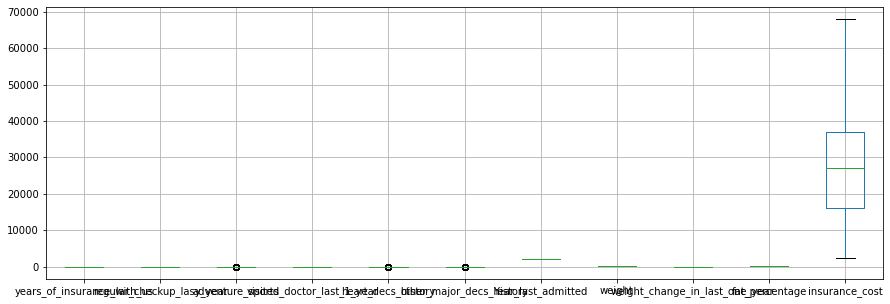

In [64]:
plt.figure(figsize=(15,5))
data.boxplot()

In [65]:
data['heart_decs_history'].value_counts()

0    22569
1     1190
Name: heart_decs_history, dtype: int64

In [66]:
data.head()

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,heart_decs_history,other_major_decs_history,Gender,smoking_status,...,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost,cbmi,cage,cdailyavgsteps,cavgglucoselevel
0,3,1.0,1,Salried,2.0,125 to 150,1,0,Male,never smoked,...,N,Rare,Moderate,1,25,20978,obese,20-29,4000-4999,normal
1,0,0.0,0,Student,4.0,150 to 175,0,0,Male,formerly smoked,...,N,Rare,Moderate,3,27,6170,obese,50-59,6000-6999,diabetes
2,1,0.0,0,Business,4.0,200 to 225,0,0,Female,formerly smoked,...,N,Daily,Extreme,0,32,28382,obese,60-69,4000-4999,pre-diabetic
3,7,2.5,0,Business,2.0,175 to 200,0,0,Female,never smoked,...,Y,Rare,No,3,37,27148,normal-weight,50-59,6000-6999,normal
4,3,1.0,0,Student,2.0,150 to 175,0,1,Male,never smoked,...,N,No,Extreme,0,34,29616,over-weight,40-49,4000-4999,normal


In [67]:
data.shape

(23759, 23)

In [68]:
cat=[]
num=[]
for i in data.columns:
    if data[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['Occupation', 'cholesterol_level', 'Gender', 'smoking_status', 'Location', 'covered_by_any_other_company', 'Alcohol', 'exercise', 'cbmi', 'cage', 'cdailyavgsteps', 'cavgglucoselevel']
['years_of_insurance_with_us', 'regular_checkup_lasy_year', 'adventure_sports', 'visited_doctor_last_1_year', 'heart_decs_history', 'other_major_decs_history', 'Year_last_admitted', 'weight', 'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost']


In [69]:
print(cat)

['Occupation', 'cholesterol_level', 'Gender', 'smoking_status', 'Location', 'covered_by_any_other_company', 'Alcohol', 'exercise', 'cbmi', 'cage', 'cdailyavgsteps', 'cavgglucoselevel']


In [70]:
data =pd.get_dummies(data, columns=cat,drop_first=True)

In [71]:
data.head()

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,visited_doctor_last_1_year,heart_decs_history,other_major_decs_history,Year_last_admitted,weight,weight_change_in_last_one_year,fat_percentage,...,cdailyavgsteps_2000-2999,cdailyavgsteps_3000-3999,cdailyavgsteps_4000-4999,cdailyavgsteps_5000-5999,cdailyavgsteps_6000-6999,cdailyavgsteps_7000-7999,cdailyavgsteps_8000-8999,cdailyavgsteps_9000-9999,cavgglucoselevel_normal,cavgglucoselevel_pre-diabetic
0,3,1.0,1,2.0,1,0,2003.877355,67,1,25,...,0,0,1,0,0,0,0,0,1,0
1,0,0.0,0,4.0,0,0,2003.877355,58,3,27,...,0,0,0,0,1,0,0,0,0,0
2,1,0.0,0,4.0,0,0,2003.877355,73,0,32,...,0,0,1,0,0,0,0,0,0,1
3,7,2.5,0,2.0,0,0,2003.877355,71,3,37,...,0,0,0,0,1,0,0,0,1,0
4,3,1.0,0,2.0,0,1,2004.000000,74,0,34,...,0,0,1,0,0,0,0,0,1,0


In [72]:
data.shape

(23759, 59)

In [73]:
print(num)

['years_of_insurance_with_us', 'regular_checkup_lasy_year', 'adventure_sports', 'visited_doctor_last_1_year', 'heart_decs_history', 'other_major_decs_history', 'Year_last_admitted', 'weight', 'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost']


In [74]:
num1=['years_of_insurance_with_us', 'regular_checkup_lasy_year', 'visited_doctor_last_1_year','weight','fat_percentage','weight_change_in_last_one_year'] 
### removing the correlated variable which was dropped earlier and target variable


In [75]:
data[num1] = data[num1].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [76]:
data.head()

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,visited_doctor_last_1_year,heart_decs_history,other_major_decs_history,Year_last_admitted,weight,weight_change_in_last_one_year,fat_percentage,...,cdailyavgsteps_2000-2999,cdailyavgsteps_3000-3999,cdailyavgsteps_4000-4999,cdailyavgsteps_5000-5999,cdailyavgsteps_6000-6999,cdailyavgsteps_7000-7999,cdailyavgsteps_8000-8999,cdailyavgsteps_9000-9999,cavgglucoselevel_normal,cavgglucoselevel_pre-diabetic
0,0.375,0.4,1,0.285714,1,0,2003.877355,0.340909,0.166667,0.451613,...,0,0,1,0,0,0,0,0,1,0
1,0.000,0.0,0,0.571429,0,0,2003.877355,0.136364,0.500000,0.516129,...,0,0,0,0,1,0,0,0,0,0
2,0.125,0.0,0,0.571429,0,0,2003.877355,0.477273,0.000000,0.677419,...,0,0,1,0,0,0,0,0,0,1
3,0.875,1.0,0,0.285714,0,0,2003.877355,0.431818,0.500000,0.838710,...,0,0,0,0,1,0,0,0,1,0
4,0.375,0.4,0,0.285714,0,1,2004.000000,0.500000,0.000000,0.741935,...,0,0,1,0,0,0,0,0,1,0


In [77]:
# Copy all the predictor variables into X dataframe
x = data.drop(['insurance_cost'], axis=1)

# Copy target into the y dataframe. 
Y = data['insurance_cost']

In [78]:
Y.head()

0    20978
1     6170
2    28382
3    27148
4    29616
Name: insurance_cost, dtype: int64

In [79]:
x.iloc[1,:] 

years_of_insurance_with_us           0.000000
regular_checkup_lasy_year            0.000000
adventure_sports                     0.000000
visited_doctor_last_1_year           0.571429
heart_decs_history                   0.000000
other_major_decs_history             0.000000
Year_last_admitted                2003.877355
weight                               0.136364
weight_change_in_last_one_year       0.500000
fat_percentage                       0.516129
Occupation_Salried                   0.000000
Occupation_Student                   1.000000
cholesterol_level_150 to 175         1.000000
cholesterol_level_175 to 200         0.000000
cholesterol_level_200 to 225         0.000000
cholesterol_level_225 to 250         0.000000
Gender_Male                          1.000000
smoking_status_never smoked          0.000000
smoking_status_smokes                0.000000
Location_Bangalore                   0.000000
Location_Bhubaneswar                 0.000000
Location_Chennai                  

In [80]:
x.iloc[36,:] 

years_of_insurance_with_us           0.625000
regular_checkup_lasy_year            0.000000
adventure_sports                     0.000000
visited_doctor_last_1_year           0.428571
heart_decs_history                   0.000000
other_major_decs_history             0.000000
Year_last_admitted                2001.500000
weight                               0.818182
weight_change_in_last_one_year       0.166667
fat_percentage                       0.419355
Occupation_Salried                   0.000000
Occupation_Student                   1.000000
cholesterol_level_150 to 175         1.000000
cholesterol_level_175 to 200         0.000000
cholesterol_level_200 to 225         0.000000
cholesterol_level_225 to 250         0.000000
Gender_Male                          1.000000
smoking_status_never smoked          0.000000
smoking_status_smokes                0.000000
Location_Bangalore                   0.000000
Location_Bhubaneswar                 0.000000
Location_Chennai                  

In [81]:
x.columns

Index(['years_of_insurance_with_us', 'regular_checkup_lasy_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'heart_decs_history',
       'other_major_decs_history', 'Year_last_admitted', 'weight',
       'weight_change_in_last_one_year', 'fat_percentage',
       'Occupation_Salried', 'Occupation_Student',
       'cholesterol_level_150 to 175', 'cholesterol_level_175 to 200',
       'cholesterol_level_200 to 225', 'cholesterol_level_225 to 250',
       'Gender_Male', 'smoking_status_never smoked', 'smoking_status_smokes',
       'Location_Bangalore', 'Location_Bhubaneswar', 'Location_Chennai',
       'Location_Delhi', 'Location_Guwahati', 'Location_Jaipur',
       'Location_Kanpur', 'Location_Kolkata', 'Location_Lucknow',
       'Location_Mangalore', 'Location_Mumbai', 'Location_Nagpur',
       'Location_Pune', 'Location_Surat', 'covered_by_any_other_company_Y',
       'Alcohol_No', 'Alcohol_Rare', 'exercise_Moderate', 'exercise_No',
       'cbmi_obese', 'cbmi_over-weight

In [101]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.25 , random_state=1)

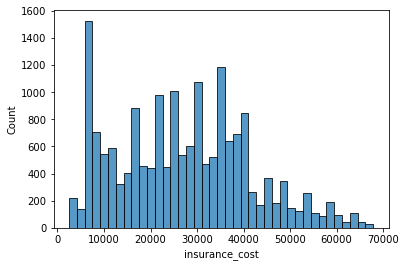

In [83]:
sns.histplot(y_train)

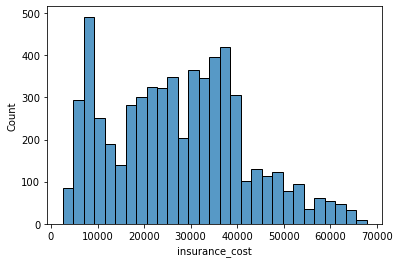

In [84]:
sns.histplot(y_test)

In [102]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [103]:
lr=LinearRegression()

In [104]:

lr.fit(x,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:

pred=lr.predict(x)

In [90]:

mean_squared_error(Y,pred,squared=False) #RMSE

3341.9624094018914

In [91]:

#R Squared
r2_score(Y,pred)

0.9455990693346643

In [92]:
lr.score(x,Y)

0.9455990693346644

In [93]:
#Predicting values


values=np.array([ 0,0,0,0.57,0,0,2003.87,0.136,0.5,0.51,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0])
values

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 5.70000e-01, 0.00000e+00,
       0.00000e+00, 2.00387e+03, 1.36000e-01, 5.00000e-01, 5.10000e-01,
       0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00])

In [94]:
lr.predict(values.reshape(1,-1))

array([7261.4660931])

In [95]:
values=np.array([0.6,0,0,0.4,0,0,2001.5,0.8,0.16,0.42,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0])

In [96]:
values

array([6.0000e-01, 0.0000e+00, 0.0000e+00, 4.0000e-01, 0.0000e+00,
       0.0000e+00, 2.0015e+03, 8.0000e-01, 1.6000e-01, 4.2000e-01,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00])

In [97]:
lr.predict(values.reshape(1,-1))

array([50461.59679953])

In [120]:
rfr.fit(x,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [121]:

pred_r=rfr.predict(x)

In [122]:

mean_squared_error(Y,pred_r,squared=False) #RMSE

1149.1357539927376

In [123]:
rfr.score(x,Y)

0.9935680022611023

In [124]:
rfr.predict(values.reshape(1,-1))

array([50865.48])

In [117]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [4]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
 
    else :
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
 
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

NameError: name 'X_train' is not defined

Looks Like DT, and RF are over-fitting, Let's Grid Search to get the best parameters

#Grid Search on Decision Tree

In [297]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(X_train,y_train)

print(grid_search.best_params_)


{'max_depth': 10, 'min_samples_leaf': 30, 'min_samples_split': 15}


USING GRID SEARCH FOR RANDOM FOREST

In [298]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

Using Grid Search for ANN

In [94]:
param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=10000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
print(grid_search.best_params_)

In [108]:
annr = MLPRegressor(activation='relu', hidden_layer_sizes=(500), 
                    solver='sgd',random_state=123, 
                    max_iter=10000)
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=15,min_samples_leaf=15,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
    if (i != annr):
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
        
    else :
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))


                            Train RMSE      Test RMSE  Training Score  \
Linear Regression          3360.677137    3292.165547        0.944958   
Decision Tree Regressor    2802.939121    3107.456426        0.961712   
Random Forest Regressor    6086.060224    6342.336294        0.819485   
ANN Regressor            625527.997179  625722.317644    -1905.926102   

                          Test Score  
Linear Regression           0.947287  
Decision Tree Regressor     0.953036  
Random Forest Regressor     0.804363  
ANN Regressor           -1903.212897  




## NB with SMOTE

In [110]:
from imblearn.over_sampling import SMOTE

C:\Users\Suga\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Suga\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Suga\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in ve

In [111]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

C:\Users\Suga\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Suga\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Suga\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Suga\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category

C:\Users\Suga\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Suga\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Suga\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Suga\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category

In [112]:
## Let's check the shape after SMOTE
X_train_res.shape


(46062, 58)

In [118]:
DT_SM_model = DecisionTreeRegressor()
DT_SM_model.fit(X_train_res, y_train_res)

NameError: name 'DecisionTreeRegressor' is not defined

In [300]:

rfr = RandomForestRegressor(random_state=123)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [301]:
pred_r=rfr.predict(X_train)

In [272]:

pred=lr.predict(X_train_res)

In [302]:

mean_squared_error(y_train,pred_r,squared=False) #RMSE

1157.9905752705606

In [303]:

#R Squared
r2_score(y_train,pred_r)

0.9934649275309012

In [305]:
rfr.score(X_train,y_train)

0.9934649275309012

In [278]:
#Predicting values


values=np.array([ 0,0,0,0.57,0,0,2003.87,0.136,0.5,0.51,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0])
values

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 5.70000e-01, 0.00000e+00,
       0.00000e+00, 2.00387e+03, 1.36000e-01, 5.00000e-01, 5.10000e-01,
       0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00])

In [306]:
rfr.predict(values.reshape(1,-1))

array([6601.9])

KNN with SMOTE

In [136]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Cross Validation on Naive Bayes Model

In [144]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN_SM_model, X_train_res, y_train_res, cv=10)
scores

array([0.57738224, 0.59084003, 0.60660009, 0.6150673 , 0.62657403,
       0.67976552, 0.74164134, 0.78419453, 0.80590534, 0.80785931])

In [145]:
scores = cross_val_score(KNN_SM_model, X_test, y_test, cv=10)
scores

C:\Users\Suga\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


array([0.04040404, 0.03703704, 0.04040404, 0.04377104, 0.03703704,
       0.03535354, 0.03872054, 0.04545455, 0.06060606, 0.04040404])